<a href="https://www.kaggle.com/code/utkarshx27/startups-data-analysis?scriptVersionId=141476930" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# <div style="padding: 40px;color:white;margin:10;font-size:90%;text-align:center;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://cms.bbcearth.com/sites/default/files/2020-09/Rectangle%209.jpg)"><b><span style='color:white'>A Look at Startups data</span></b> </div>
***

<div style="width:100%;text-align:center"> 
<img align=middle src = "https://www.tomorrowmakers.com/sites/default/files/2022-09/Top%20start%20ups%20in%20India.jpg" width="700px">
</div>


In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.exceptions import ConvergenceWarning
import plotly.express as px
import warnings
warnings.filterwarnings('ignore', category=ConvergenceWarning)

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df= pd.read_csv('/kaggle/input/2021-startups/Startups in 2021 end.csv').drop(columns=['Unnamed: 0'])
df.head()

,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Investors
0,Bytedance,$140,4/7/2017,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,$100.3,12/1/2012,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,Stripe,$95,1/23/2014,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG"
3,Klarna,$45.6,12/12/2011,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita..."
4,Canva,$40,1/8/2018,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat..."


# Data Preprocessing

In [3]:
column_name_mapping = {
    'Company': 'Name',
    'Valuation ($B)': 'Valuation',
    'Date Joined': 'JoinDate',
    'Country': 'Country',
    'City': 'City',
    'Industry': 'Industry',
    'Select Investors': 'Investors'
}

df.rename(columns=column_name_mapping, inplace=True)

df['JoinDate'] = pd.to_datetime(df['JoinDate'])
df['Valuation'] = pd.to_numeric(df['Valuation'].str.replace('$', ''), errors='coerce')

/tmp/ipykernel_20/834088957.py:14: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Valuation'] = pd.to_numeric(df['Valuation'].str.replace('$', ''), errors='coerce')


In [4]:
industry_mapping = {
    'SpaceX': 'Aerospace',
    'Epic Games': 'Gaming',
    'Thrasio': 'eCommerce',
    'HEYTEA': 'Beverage',
    'Northvolt': 'Energy',
    'Black Unicorn Factory': 'Manufacturing',
    'Howden Group Holdings': 'Insurance',
    'Relativity Space': 'Space',
    'Farmers Business Network': 'Agriculture',
    'Redwood Materials': 'Materials',
    'Sila Nanotechnologies': 'Nanotechnology',
    'Dadi Cinema': 'Entertainment',
    'Wildlife Studios': 'Gaming',
    'Vista Global': 'Aerospace',
    'ABL Space Systems': 'Aerospace',
    'Voodoo': 'Gaming',
    'Skydance Media': 'Entertainment',
    'Bowery Farming': 'Agriculture',
    'Planet Labs': 'Space',
    'NuCom Group': 'eCommerce',
    'Improbable': 'Technology',
    'OCSiAl': 'Materials',
    'Apeel Sciences': 'Food',
    'Diamond Foundry': 'Manufacturing',
    'Trader Interactive': 'Finance',
    'Wenheyou': 'Finance',
    'Uplight': 'Energy',
    'Five Star Business Finance': 'Finance',
    'GPclub': 'Media',
    'You & Mr Jones': 'Food',
    'Manner': 'Energy',
    'OVO Energy': 'Energy',
    'Nexii': 'eCommerce',
    'Spiber': 'Technology',
    'Cava Group': 'Food',
    'Inari': 'Agriculture',
    'LifeMiles': 'Finance',
    'OVH': 'Technology',
    'Rubicon Global': 'Finance',
    'Red Ventures': 'Media',
    'Revolution Precrafted': 'Manufacturing',
    'Ynsect': 'Agriculture',
    'SITECH DEV': 'Technology',
    'Emerging Markets Property Group': 'Finance',
    'Playco': 'Gaming',
    'Boom Supersonic': 'Aerospace',
    'Axiom Space': 'Space',
    'Sentry': 'Technology',
    'Firefly Aerospace': 'Aerospace',
    'Printful': 'eCommerce',
    'Mensa Brands': 'Food',
    'Digital Currency Group' : 'Fintech'
}
df['Industry'] = df['Name'].map(industry_mapping).fillna(df['Industry'])

In [5]:
duplicate_rows = df[df['Name'].duplicated()]
duplicate_company = duplicate_rows['Name'].values[0]

df[df['Name'] == 'Bolt']

,Name,Valuation,JoinDate,Country,City,Industry,Investors
94,Bolt,6.00,2021-10-08,United States,San Francisco,Fintech,"Activant Capital, Tribe Capital, General Atlantic"
141,Bolt,4.75,2018-05-29,Estonia,Tallinn,Auto & transportation,"Didi Chuxing, Diamler, TMT Investments"


# Analysis

In [6]:
industry_counts = df['Industry'].value_counts().reset_index()
industry_counts.columns = ["Industry", "Number of Companies"]
fig = px.bar(industry_counts, x="Number of Companies", y="Industry", orientation="h", 
             title="Number of Companies by Industry",
             labels={"Number of Companies": "Number of Companies", "Industry": "Industry"})
fig.update_layout(width=1200, height=600)
fig.show()

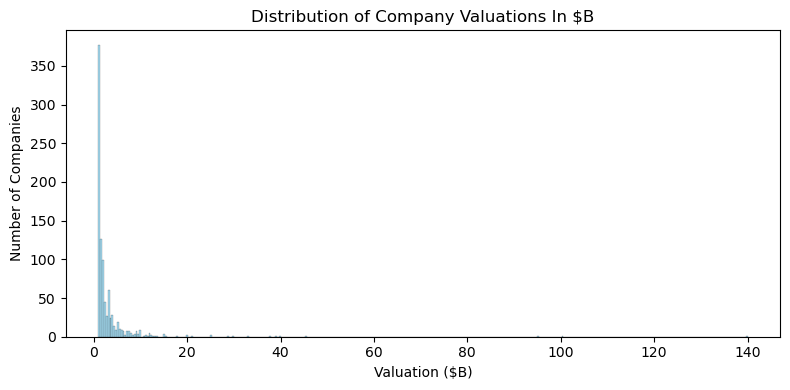

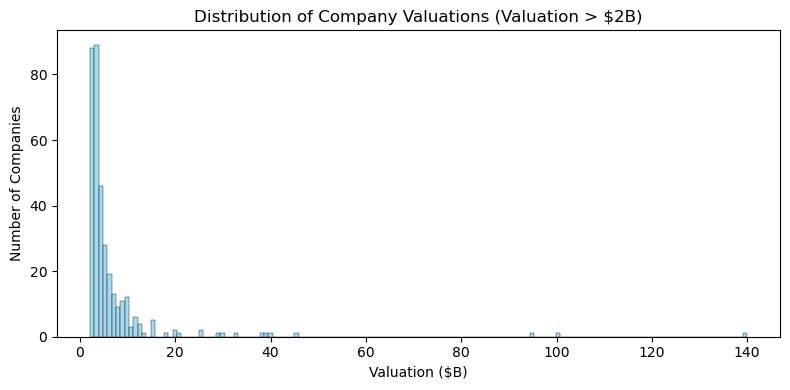

In [7]:
plt.figure(figsize=(8, 4))
sns.histplot(x=df['Valuation'], color='skyblue')
plt.title('Distribution of Company Valuations In $B')
plt.xlabel('Valuation ($B)')
plt.ylabel('Number of Companies')
plt.tight_layout()
plt.show()

filtered_df = df[df['Valuation'] > 2]
plt.figure(figsize=(8, 4))
sns.histplot(x=filtered_df['Valuation'], color='skyblue')
plt.title('Distribution of Company Valuations (Valuation > $2B)')
plt.xlabel('Valuation ($B)')
plt.ylabel('Number of Companies')
plt.tight_layout()
plt.show()

In [8]:
country_counts = df['Country'].value_counts().reset_index()
country_counts.columns = ["Country", "Number of Companies"]
plt.figure(figsize=(10,8))
fig = px.bar(country_counts, x="Number of Companies", y="Country", orientation="h", 
             title="Country Distribution of Companies",
             labels={"Number of Companies": "Number of Companies", "Country": "Country"})
fig.update_layout(width=1200, height=800)
fig.show()

<Figure size 1000x800 with 0 Axes>

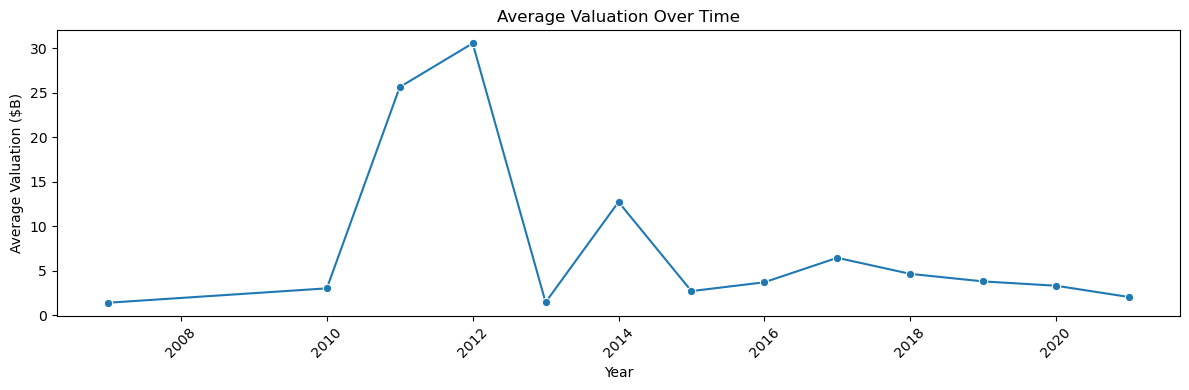

In [9]:
df['Year'] = df['JoinDate'].dt.year
average_valuation_by_year = df.groupby('Year')['Valuation'].mean()
plt.figure(figsize=(12, 4))
sns.lineplot(x=average_valuation_by_year.index, y=average_valuation_by_year.values, marker='o')
plt.title('Average Valuation Over Time')
plt.xlabel('Year')
plt.ylabel('Average Valuation ($B)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [10]:
us_startups = df[df["Country"] == "United States"]
city_counts = us_startups["City"].value_counts().head(10).reset_index()
city_counts.columns = ["City", "Number of Startups"]
fig = px.bar(city_counts, x="Number of Startups", y="City", orientation="h", 
             title="Top 10 Cities with the Most Startups in the United States",
             labels={"Number of Startups": "Number of Startups", "City": "City"})
fig.show()

In [11]:
us_startups = df[df["Country"] == "China"]
city_counts = us_startups["City"].value_counts().head(5).reset_index()
city_counts.columns = ["City", "Number of Startups"]
fig = px.bar(city_counts, x="Number of Startups", y="City", orientation="h", 
             title="Top 5 Cities with the Most Startups in the China",
             labels={"Number of Startups": "Number of Startups", "City": "City"})
fig.show()

In [12]:
us_startups = df[df["Country"] == "India"]
city_counts = us_startups["City"].value_counts().head(5).reset_index()
city_counts.columns = ["City", "Number of Startups"]
fig = px.bar(city_counts, x="Number of Startups", y="City", orientation="h", 
             title="Top 5 Cities with the Most Startups in the India",
             labels={"Number of Startups": "Number of Startups", "City": "City"})
fig.show()

In [13]:
df['Investors'] = df['Investors'].str.split(',')
df = df.explode('Investors')
df['Investors'] = df['Investors'].str.strip()
top_investors = df['Investors'].value_counts().head(10).reset_index()
top_investors.columns = ["Investor", "Count"]
fig = px.bar(top_investors, x="Count", y="Investor", orientation="h",
             title="Top 10 Investors in Startup Companies",
             labels={"Count": "Number of Investments", "Investor": "Investor"})
fig.update_layout(width=1200, height=600)
fig.show()

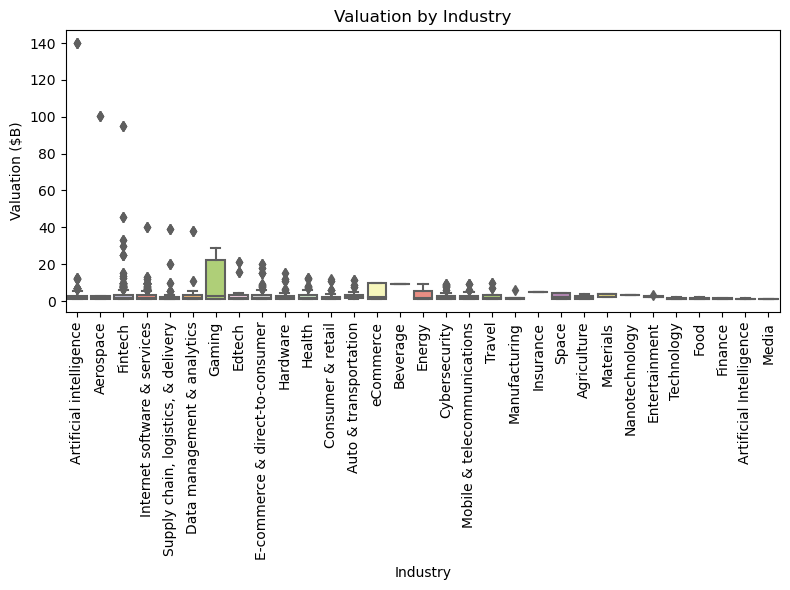

In [14]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Industry', y='Valuation', data=df, palette='Set3')
plt.title('Valuation by Industry')
plt.xticks(rotation=90)
plt.xlabel('Industry')
plt.ylabel('Valuation ($B)')
plt.tight_layout()
plt.show()